In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def train(l0, syn0, niter):
    err = np.zeros(niter)
    for i in range(niter):
        # forward propagation
        l0 = X
        l1 = nonlin(np.dot(l0,syn0))

        # how much did we miss?
        l1_error = y - l1
        err[i] = np.linalg.norm(l1_error)

        # multiply how much we missed by the 
        # slope of the sigmoid at the values in l1
        l1_delta = l1_error * nonlin(l1,True)

        # update weights
        syn0 += np.dot(l0.T,l1_delta)

    return l1, err

Output After Training:
[[0.02210697]
 [0.01793972]
 [0.98540523]
 [0.98200075]]


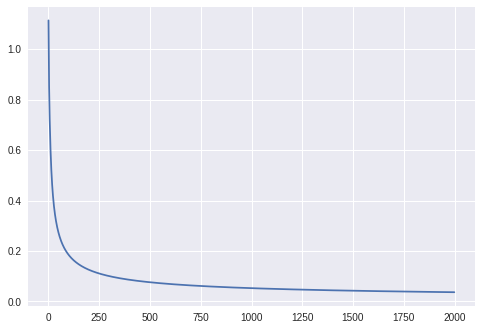

In [11]:
# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

l1, err = train(X, syn0, 2000)
plt.plot(err)

print("Output After Training:")
print(l1)

In [19]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])
                
y = np.array([[0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1],
              [0,0,0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,3)) - 1

for j in range(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print(np.round(l2, 2))

Error:0.49971668796083607
Error:0.0220967505054539
Error:0.015097996748951863
Error:0.012160669856400888
Error:0.010449184073220612
Error:0.009296756774134309
[[0.01 0.02 1.  ]
 [0.   0.99 0.  ]
 [0.   0.98 1.  ]
 [0.98 0.   0.  ]
 [1.   0.   1.  ]
 [0.98 0.98 0.01]
 [0.99 0.99 0.99]
 [0.02 0.02 0.  ]]
